In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
import seaborn as sns


Read the train and test datasets

In [79]:
# Read the training and testing data.
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [80]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [81]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [82]:
data['Id'] = data['Id'].astype(str)
data['DistrictId'] = data['DistrictId'].astype(str)

In [83]:
data.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Explore the target

Text(0, 0.5, 'Count')

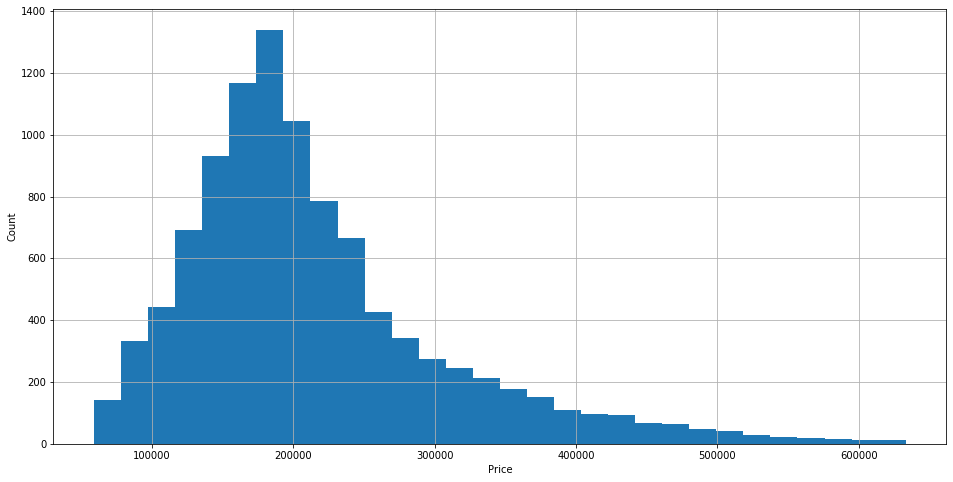

In [84]:
plt.figure(figsize = (16,8))

data['Price'].hist(bins = 30)
plt.xlabel('Price')
plt.ylabel('Count')

In [85]:
data.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [86]:
data['Id'].value_counts()

10797    1
5267     1
10065    1
2563     1
4792     1
        ..
7108     1
13530    1
10831    1
268      1
8857     1
Name: Id, Length: 10000, dtype: int64

In [87]:
data['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
209      1
207      1
196      1
174      1
199      1
Name: DistrictId, Length: 205, dtype: int64

In [88]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [89]:
data['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [90]:
data['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [91]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [92]:
# Try to mark the outliers 
data['Rooms_outliers'] = 0

In [93]:
# Mark all the outlying rooms with 1 
data.loc[(data['Rooms'] >= 6) | (data['Rooms'] ==0), 'Rooms_outliers'] = 1

In [94]:
# Change the value of the outliers in the original room column
data.loc[(data['Rooms'] == 0)] =1

In [95]:
# Replace the rooms where there are zero with the mean values
data.loc[(data['Rooms'] >= 6)] = data['Rooms'].median()

In [96]:
data['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [97]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'Rooms_outliers'],
      dtype='object')

In [98]:
condition = (data['KitchenSquare'].isna()) | (data['KitchenSquare'] > data['KitchenSquare'].quantile(.975))

In [99]:
data.loc[condition,'KitchenSquare'] = data['KitchenSquare'].median()

In [100]:
data.loc[data['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [101]:
data['KitchenSquare'].value_counts()

3.0     3188
8.0     1306
6.0     1226
5.0     1169
10.0    1073
9.0      842
7.0      608
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

In [102]:
# The floor and housefloor column

In [103]:
data['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [104]:
data['Floor'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 31., 32., 33., 37., 42.])

In [105]:
(data['Floor'] > data['HouseFloor']).sum()

1819

In [106]:
data['HouseFloor_outlier'] = 0
data.loc[(data['HouseFloor'] == 0), 'HouseFloor_outlier'] = 1
data.loc[(data['Floor'] > data['HouseFloor']),'HouseFloor_outlier'] = 1

In [107]:
data.loc[data['HouseFloor'] == 0,'HouseFloor'] = data['HouseFloor'].median()

In [108]:
floor_outliers = data['Floor'] > data['HouseFloor']

In [109]:
import random
data.loc[floor_outliers,'Floor'] = data.loc[floor_outliers,'HouseFloor'].apply(lambda x: random.randint(1,x))

In [110]:
#  For the houseYear

In [111]:
data['HouseYear'].sort_values(ascending = False).unique()

array([2.0052011e+07, 4.9680000e+03, 2.0200000e+03, 2.0190000e+03,
       2.0180000e+03, 2.0170000e+03, 2.0160000e+03, 2.0150000e+03,
       2.0140000e+03, 2.0130000e+03, 2.0120000e+03, 2.0110000e+03,
       2.0100000e+03, 2.0090000e+03, 2.0080000e+03, 2.0070000e+03,
       2.0060000e+03, 2.0050000e+03, 2.0040000e+03, 2.0030000e+03,
       2.0020000e+03, 2.0010000e+03, 2.0000000e+03, 1.9990000e+03,
       1.9980000e+03, 1.9970000e+03, 1.9960000e+03, 1.9950000e+03,
       1.9940000e+03, 1.9930000e+03, 1.9920000e+03, 1.9910000e+03,
       1.9900000e+03, 1.9890000e+03, 1.9880000e+03, 1.9870000e+03,
       1.9860000e+03, 1.9850000e+03, 1.9840000e+03, 1.9830000e+03,
       1.9820000e+03, 1.9810000e+03, 1.9800000e+03, 1.9790000e+03,
       1.9780000e+03, 1.9770000e+03, 1.9760000e+03, 1.9750000e+03,
       1.9740000e+03, 1.9730000e+03, 1.9720000e+03, 1.9710000e+03,
       1.9700000e+03, 1.9690000e+03, 1.9680000e+03, 1.9670000e+03,
       1.9660000e+03, 1.9650000e+03, 1.9640000e+03, 1.9630000e

In [112]:
data.loc[data['HouseYear'] > 2020,'HouseYear'] = 2020

In [113]:
data['HouseYear'].astype('int64').sort_values(ascending = False).unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1951, 1950, 1948, 1947, 1942, 1941, 1940, 1939,
       1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928,
       1919, 1918, 1917, 1916, 1914, 1912, 1910,    2,    1])

In [114]:
data.loc[((data['HouseYear'] == 1)|(data['HouseYear'] == 2)), 'HouseYear'] = 2020 

In [115]:
#  Working with missing values

In [116]:
data.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2110
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4790
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outliers           0
HouseFloor_outlier       0
dtype: int64

In [117]:
data["LifeSquare_nan"] = data['LifeSquare'].isna() * 1

In [118]:
data[['Square','LifeSquare','KitchenSquare']]

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,3.0
4,64.285067,38.562517,9.0
...,...,...,...
9995,49.090728,33.272626,6.0
9996,64.307684,37.038420,9.0
9997,29.648057,16.555363,5.0
9998,32.330292,22.326870,5.0


In [119]:
condition = (data['LifeSquare'].isna()) & (~ data['Square'].isna()) & (~data['KitchenSquare'].isna())

In [120]:
data.loc[condition,'LifeSquare'] = data.loc[condition,'KitchenSquare'] - data.loc[condition, 'Square'] - 3

In [121]:
class DataPreprocessing:
    
    def __init__(self):
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self,X):
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        
    def transform(self,X):
        X['Room_outlier'] = 0
        X.loc[((X['Rooms'] ==0 ) | (X['Rooms'] >= 6)),'Room_outlier'] = 1
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        #KitchenSquare
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare' ] = 3
        
        #HouseFloor, Floor
        
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1,x))
        
        #HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year,'HouseYear_outlier'] = 1
        X.loc[X['HouseYear'] > current_year,'HouseYear'] = current_year
        
        
        #HealthCare
        if 'Healthcare_1' in X.columns:
            X['Healthcare_1_nan'] = 0
            X.loc[X['Healthcare_1'].isna(),'Healthcare_1_nan'] = 1
            X.loc[X['Healthcare_1'].isna(),'Healthcare_1'] = self.medians['Healthcare_1']

            
            
        #LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() *1
        condition = (X['LifeSquare'].isna() & (~X['Square'].isna()) & (~X['KitchenSquare'].isna()))
        
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition,'KitchenSquare'] - 3
        
        X.fillna(self.medians, inplace = True)
        
        return X

In [122]:
# Drawing new features

In [123]:
binary_to_numbers = {'A':0, 'B':1}
data['Ecology_2'] = data['Ecology_2'].replace(binary_to_numbers)
data['Ecology_3'] = data['Ecology_3'].replace(binary_to_numbers)
data['Shops_2'] = data['Shops_2'].replace(binary_to_numbers)

In [124]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outliers,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,-108.027311,10.0,4.0,10.0,2014.0,0.075424,...,3097.0,0.0,NaN,0.0,0.0,1.0,305018.871089,0.0,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,6207.0,1.0,1183.0,1.0,0.0,1.0,177734.553407,0.0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,5261.0,0.0,240.0,3.0,1.0,1.0,282078.720850,0.0,0,0
3,2352,1,1.0,40.409907,-40.409907,3.0,10.0,22.0,1977.0,0.007122,...,264.0,0.0,NaN,0.0,1.0,1.0,168106.007630,0.0,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,8667.0,2.0,NaN,0.0,6.0,1.0,343995.102962,0.0,0,0


In [125]:
# DistrictSize

In [126]:
district_size = data['DistrictId'].value_counts().reset_index().rename(columns = {'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [127]:
data = data.merge(district_size, on='DistrictId', how='left')

In [128]:
data['IsDistrictLarge'] = (data['DistrictSize'] > 100).astype(int)

In [129]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outliers,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027311,-108.027311,10.0,4.0,10.0,2014.0,0.075424,...,NaN,0.0,0.0,1.0,305018.871089,0.0,0,1,846,1
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1183.0,1.0,0.0,1.0,177734.553407,0.0,0,0,78,0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,240.0,3.0,1.0,1.0,282078.720850,0.0,0,0,651,1
3,2352,1,1.0,40.409907,-40.409907,3.0,10.0,22.0,1977.0,0.007122,...,NaN,0.0,1.0,1.0,168106.007630,0.0,0,1,651,1
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,NaN,0.0,6.0,1.0,343995.102962,0.0,0,0,89,0


In [130]:
# MedPriceByDistrict

In [131]:
med_price_by_district = data.groupby(['DistrictId', 'Rooms'], as_index=False).agg(
    {'Price': 'median'}).rename(columns={'Price': 'MedPriceByDistrict'})

In [132]:
med_price_by_district

,DistrictId,Rooms,MedPriceByDistrict
0,1,1.0,1.000000
1,2,2.0,2.000000
2,0,1.0,142799.434052
3,0,2.0,176210.812334
4,0,3.0,300610.359425
...,...,...,...
664,98,3.0,245090.013271
665,98,4.0,450946.459365
666,99,1.0,158539.052715
667,99,2.0,187254.720362


In [133]:
data = data.merge(med_price_by_district, on=['DistrictId','Rooms'], how='left')

In [134]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outliers,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,-108.027311,10.0,4.0,10.0,2014.0,0.075424,...,0.0,0.0,1.0,305018.871089,0.0,0,1,846,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1.0,0.0,1.0,177734.553407,0.0,0,0,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,3.0,1.0,1.0,282078.720850,0.0,0,0,651,1,244005.272380
3,2352,1,1.0,40.409907,-40.409907,3.0,10.0,22.0,1977.0,0.007122,...,0.0,1.0,1.0,168106.007630,0.0,0,1,651,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,0.0,6.0,1.0,343995.102962,0.0,0,0,89,0,201584.441255


In [58]:
# MedPriceByFloorYear

In [59]:
def floor_to_cat(X):
    X['floor_cat'] = 0
    
    X.loc[X['Floor'] <= 3,'floor_cat'] = 1
    X.loc[(X['Floor'] > 3)&(X['Floor'] <=5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5
    
    return X


def floor_to_cat_pandas(X):
    bins = [0,3,5,9,15,X['Floor'].max()]
    X['Floor_cat' ] = pd.cut(X['Floor'], bins = bins, labels = False)
    X['Floor_cat'].fillna(-1, inplace = True)
    return X


def year_to_cat(X):
    X['year_cat'] = 0
    X.loc[X['HouseYear']<=1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945),'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980),'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010),'year_cat'] = 5
    X.loc[X['HouseYear'] > 2010, 'year_cat'] = 6
    return X

def year_to_cat_pandas(X):
    bins = [0,1941,1945,1980,2000,2010,X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins = bins, label=False)
    X['year_cat'].fillna(-1,inplace = True)
    
    return X



In [60]:
bins = [0,3,5,9,15,data['Floor'].max()]
pd.cut(data['Floor'],bins=bins)

0         (3.0, 5.0]
1         (5.0, 9.0]
2         (0.0, 3.0]
3        (9.0, 15.0]
4       (15.0, 42.0]
            ...     
9995      (0.0, 3.0]
9996     (9.0, 15.0]
9997      (0.0, 3.0]
9998      (0.0, 3.0]
9999      (5.0, 9.0]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[float64]): [(0.0, 3.0] < (3.0, 5.0] < (5.0, 9.0] < (9.0, 15.0] < (15.0, 42.0]]

In [61]:
data = year_to_cat(data)

In [62]:
data = floor_to_cat(data)

In [63]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Rooms_outliers,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,-108.027311,10.0,4.0,10.0,2014.0,0.075424,...,1.0,305018.871089,0.0,0,1,846,1,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1.0,177734.553407,0.0,0,0,78,0,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,1.0,282078.720850,0.0,0,0,651,1,244005.272380,4,1
3,2352,1,1.0,40.409907,-40.409907,3.0,10.0,22.0,1977.0,0.007122,...,1.0,168106.007630,0.0,0,1,651,1,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,1.0,343995.102962,0.0,0,0,89,0,201584.441255,3,5


In [64]:
med_price_by_floor_year = data.groupby(['year_cat','floor_cat'], as_index = False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByFloorYear'})


In [65]:
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,374737.658654
1,1,2,321506.277104
2,1,3,386374.053775
3,1,4,274992.472366
4,2,1,467230.539057


In [66]:
data = data.merge(med_price_by_floor_year,how='left',on=['year_cat','floor_cat'])

In [67]:
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_outliers,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,-108.027311,10.0,4.0,10.0,2014.0,0.075424,...,305018.871089,0.0,0,1,846,1,213530.788443,6,2,161825.406053
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,177734.553407,0.0,0,0,78,0,146032.829834,3,3,192736.759561
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,282078.720850,0.0,0,0,651,1,244005.272380,4,1,205210.068542
3,2352,1,1.0,40.409907,-40.409907,3.0,10.0,22.0,1977.0,0.007122,...,168106.007630,0.0,0,1,651,1,146735.671740,3,4,183575.193416
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,343995.102962,0.0,0,0,89,0,201584.441255,3,5,173163.051102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3.0,12.0,1981.0,0.300323,...,119367.455796,0.0,0,0,118,1,232514.855623,4,1,205210.068542
9996,16265,27,2.0,64.307684,37.038420,9.0,13.0,13.0,1977.0,0.072158,...,199715.148807,0.0,1,0,846,1,165683.084779,3,4,183575.193416
9997,2795,178,1.0,29.648057,16.555363,5.0,3.0,5.0,1958.0,0.460556,...,165953.912580,0.0,0,0,7,0,165953.912580,3,1,179600.658613
9998,14561,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969.0,0.194489,...,171842.411855,0.0,0,0,165,1,153921.400690,3,1,179600.658613


In [68]:
class FeatureGenerator():
    def __init__(self):
        #Getting new feature
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None

    def fit(self, X, y=None):
        X = X.copy()

        self.binary_to_numbers = {'A': 0, 'B': 1}

        self.district_size = X['DistrictId'].value_counts().reset_index(
        ).rename(columns={
            'index': 'DistrictId',
            'DistrictId': 'DistrictSize'
        })
        df = X.copy()

        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(
                ['DistrictId', 'Rooms'], as_index=False).agg({
                    'Price': 'median'
                }).rename(columns={'Price': 'MedPriceByDistrict'})
            self.med_price_by_district_median = self.med_price_by_district[
                'MedPriceByDistrict'].median()

        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(
                ['year_cat', 'floor_cat'],
                as_index=False).agg({'Price': 'median'}).rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
    
    def transform(self,X):
            
        #Binary Features
        X['Ecology_2'] = X['Ecology_2'].replace(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].replace(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].replace(self.binary_to_numbers)
            
        #DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
            
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(),'new_district'] = 1
            
        X['DistrictSize'].fillna(5, inplace = True)
            
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        X = self.floor_to_cat(X)
        X = self.year_to_cat(X)
        
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId','Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median,inplace = True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat','floor_cat'],how = 'left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
            
            return X
        
    def floor_to_cat(self,X):
        bins = [0,3,5,9,15,self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'],bins = bins, labels = False)
        X['floor_cat'].fillna(-1,inplace =True)
        return X
    
    
    def year_to_cat(self,X):
        bins = [0,1941,1945,1980,2000,2010,self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'],bins=bins,labels = False)
        
        X['year_cat'].fillna(-1,inplace=True)
        return X
    

Reload Data and Apply classes on datasets

In [135]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [136]:
feature_names = [
    'Rooms','Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
    'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
    'Social_3','Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'
]
new_feature_names = ['Room_outlier','Healthcare_1_nan' ,'floor_cat','HouseYear_outlier', 'year_cat','HouseFloor_outlier', 'LifeSquare_nan', 'MedPriceByFloorYear','DistrictSize','IsDistrictLarge', 
]
target_name = 'Price'

In [137]:
X = data.drop(columns=target_name)
y = data[target_name]

Split training data into training and validation

In [138]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3,shuffle=True,random_state = 42)

In [139]:
preprocessor = DataPreprocessing()

In [140]:
preprocessor.fit(X_train)

In [141]:
from datetime import datetime
X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_data)

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [142]:
X_train.shape,X_valid.shape,test_df.shape

((7000, 24), (3000, 24), (5000, 24))

In [143]:
features_gen = FeatureGenerator()
features_gen.fit(X_train,y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)
X_train.shape,X_valid.shape,test_df.shape

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

((7000, 31), (3000, 31), (5000, 31))

In [144]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [145]:
X_train.shape, X_valid.shape, test_df.shape

((7000, 27), (3000, 27), (5000, 27))

In [146]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum()

(0, 0)

Build the model

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler = StandardScaler()

In [149]:
scaled_X_train = scaler.fit_transform( X_train)
scaled_X_valid = scaler.transform( X_valid )
scaled_test_df = scaler.transform(test_df)

In [150]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns)
scaled_X_valid = pd.DataFrame(scaled_X_valid, columns = X_valid.columns)
scaled_test_df = pd.DataFrame(scaled_test_df, columns = test_df.columns)

In [151]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=6,
                                     min_samples_leaf=50,
                                     random_state=42,  
                                     n_estimators=2500, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.025)

In [152]:
gb_model.fit(scaled_X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.025, loss='huber',
                          max_depth=6, max_features='sqrt', min_samples_leaf=50,
                          n_estimators=2500, random_state=42)

In [153]:
gb_train_pred = gb_model.predict(scaled_X_train)
gb_valid_pred = gb_model.predict(scaled_X_valid)

In [154]:
def evaluate_preds(train_true_values,train_pred_values,test_true_values,test_pred_values):
    print(f"Train R2:{str(round(r2(train_true_values,train_pred_values),3))}")
    print(f"Test R2:{str(round(r2(test_true_values,test_pred_values),3))}")
    
    
    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y = train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y = test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    plt.show()
    

Train R2:0.862
Test R2:0.76


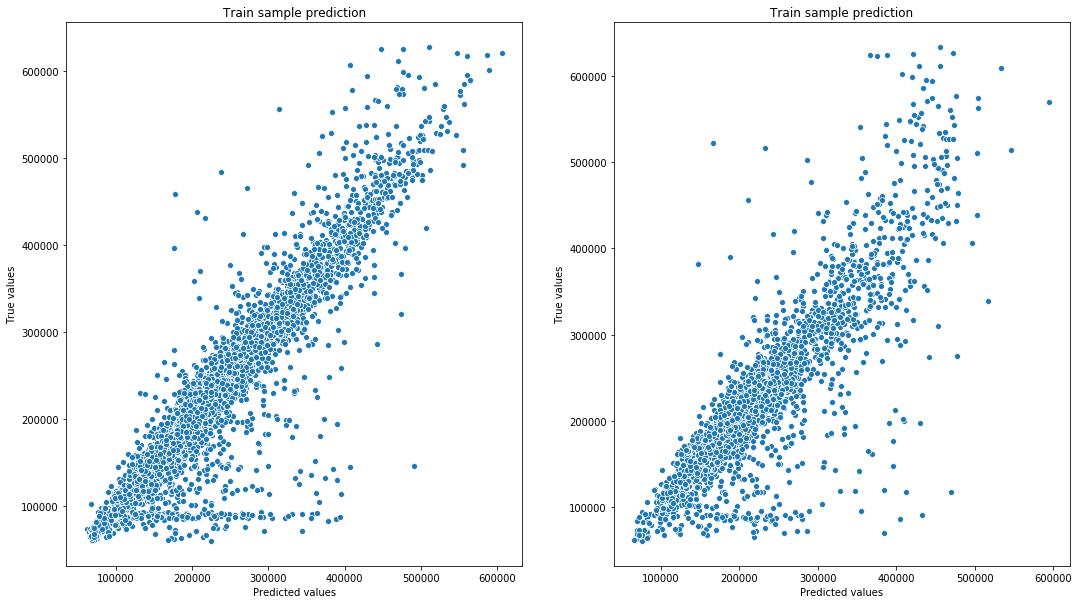

In [155]:
evaluate_preds(y_train,gb_train_pred,y_valid,gb_valid_pred)

In [156]:
feature_importance = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_),columns = ['feature_name','importance'])

In [157]:
feature_importance.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.238621
0,Rooms,0.146778
25,DistrictSize,0.110483
2,LifeSquare,0.086827
10,Social_1,0.067968
11,Social_2,0.050533
12,Social_3,0.046925
26,IsDistrictLarge,0.045485
7,Ecology_1,0.033562
3,KitchenSquare,0.026965


In [158]:
#using the test data

In [159]:
predictions = gb_model.predict(scaled_test_df)

In [160]:
submission = pd.read_csv('./sample_submission.csv')

In [161]:
submission['Price'] = predictions

In [162]:
submission

,Id,Price
0,4567,165514.402066
1,5925,123719.939274
2,960,143211.147872
3,3848,114282.680788
4,746,182799.221240
...,...,...
4995,10379,180616.825161
4996,16138,435693.735036
4997,3912,152896.178736
4998,5722,192845.498025


In [163]:
submission.to_csv('submit.csv', index=False)